In [ ]:
from google.colab import files

# Upload file CSV
uploaded = files.upload()

Saving beauty_cleaned.csv to beauty_cleaned.csv


In [ ]:
# Tắt các cảnh báo không cần thiết
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Đọc file CSV
data = pd.read_csv("beauty_cleaned.csv")

In [ ]:
# Mã hóa các cột dữ liệu dạng chuỗi thành số
categorical_columns = ['Brand', 'Category', 'Usage_Frequency', 'Skin_Type',
                       'Gender_Target', 'Packaging_Type', 'Main_Ingredient', 'Country_of_Origin']
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])

In [ ]:
#Tách dữ liệu thành các biến đầu vào (X) và biến mục tiêu (y)
X = data.drop(columns=['Cruelty_Free', 'Product_Name'])  # Loại bỏ cột mục tiêu và tên sản phẩm
y = data['Cruelty_Free']  # Cột mục tiêu

In [ ]:
#Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Huấn luyện mô hình Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

In [ ]:
#Huấn luyện mô hình Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)

In [ ]:
#Ma trận tương quan (Confusion Matrix) cho mỗi thuật toán
dt_confusion = confusion_matrix(y_test, dt_predictions)
nb_confusion = confusion_matrix(y_test, nb_predictions)

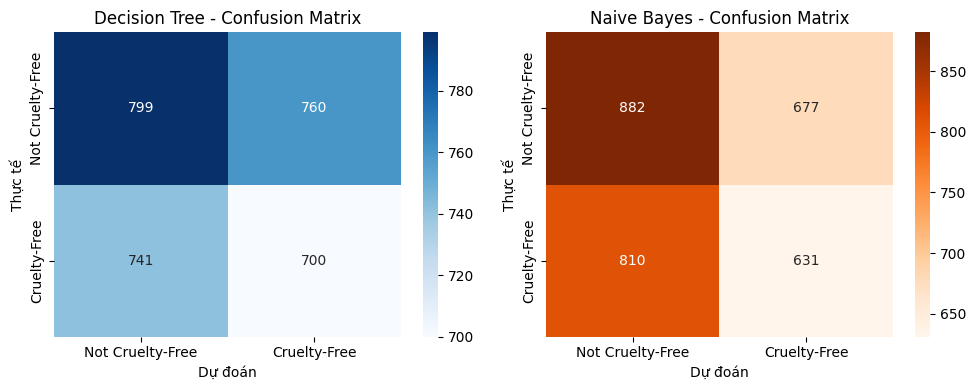

In [ ]:
# Vẽ biểu đồ nhiệt (heatmap) cho Decision Tree
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(dt_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Cruelty-Free', 'Cruelty-Free'],
            yticklabels=['Not Cruelty-Free', 'Cruelty-Free'])
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')

# Vẽ biểu đồ nhiệt (heatmap) cho Naive Bayes
plt.subplot(1, 2, 2)
sns.heatmap(nb_confusion, annot=True, fmt='d', cmap='Oranges', xticklabels=['Not Cruelty-Free', 'Cruelty-Free'],
            yticklabels=['Not Cruelty-Free', 'Cruelty-Free'])
plt.title('Naive Bayes - Confusion Matrix')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

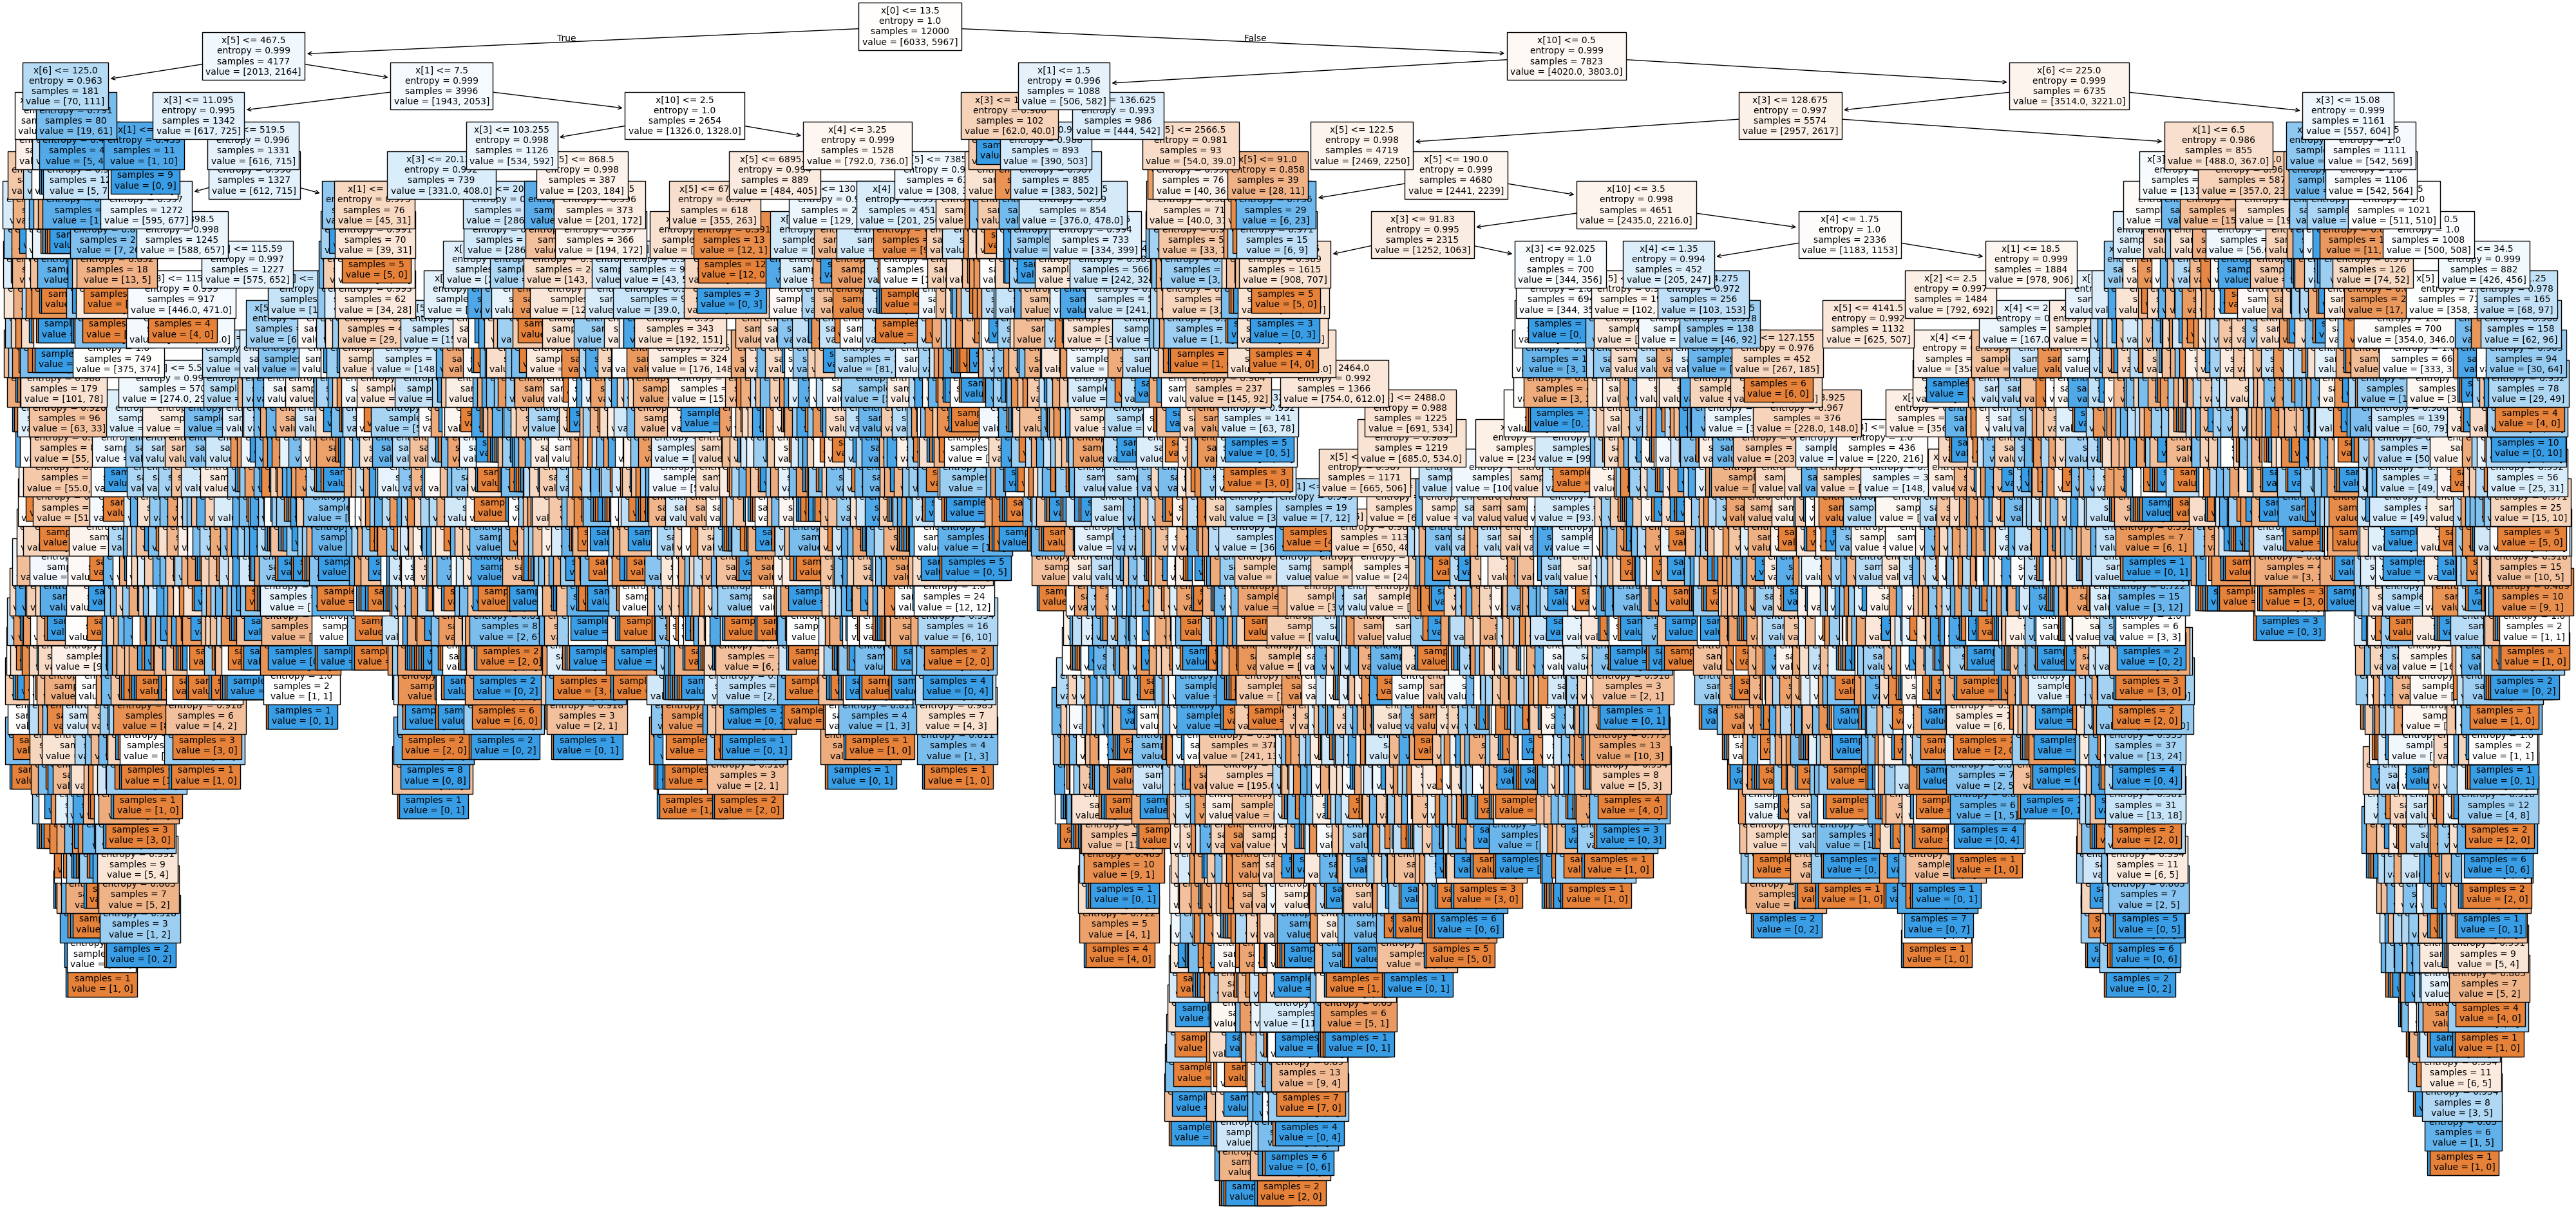

In [ ]:
fig, ax = plt.subplots(figsize = (50, 24))
tree.plot_tree(clf, filled = True, fontsize = 10)
plt.savefig('decision_tree', dpi = 100)
plt.show()

In [ ]:
# In độ chính xác của hai mô hình
print(f"Độ chính xác của Decision Tree: {dt_accuracy:.2%}")
print(f"Độ chính xác của Naive Bayes: {nb_accuracy:.2%}")

Độ chính xác của Decision Tree: 49.97%
Độ chính xác của Naive Bayes: 50.43%


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Tính Precision, Recall, F1-Score cho Decision Tree
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

# Tính Precision, Recall, F1-Score cho Naive Bayes
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)

# In kết quả
print(f"Decision Tree:")
print(f"  - Precision: {dt_precision:.2f}")
print(f"  - Recall: {dt_recall:.2f}")
print(f"  - F1-Score: {dt_f1:.2f}")

print(f"\nNaive Bayes:")
print(f"  - Precision: {nb_precision:.2f}")
print(f"  - Recall: {nb_recall:.2f}")
print(f"  - F1-Score: {nb_f1:.2f}")


Decision Tree:
  - Precision: 0.48
  - Recall: 0.49
  - F1-Score: 0.48

Naive Bayes:
  - Precision: 0.48
  - Recall: 0.44
  - F1-Score: 0.46
